# Exercise: Visas over time

#### Summary

Find out how visas issued by the US have changed over time.

#### Data Source(s)

Nonimmigrant Visa Issuances by Visa Class and by Nationality, 1999+, https://travel.state.gov/content/visas/en/law-and-policy/statistics/non-immigrant-visas.html

#### Files

- FYs97-16_NIVDetailTable.xls, "Nonimmigrant Visa Issuances by Visa Class and by Nationality, 1999+"

#### Skills

- Excel files with multiple sheets
- Combining multiple dataframes
- Filling in null values (filling down)
- Dropping and filtering rows
- Renaming columns
- Looping to clean a sheet
- Customizing matplotlib graphs

# Read in FYs97-16_NIVDetailTable.xls, but only the 1999 data

In [1]:
import pandas as pd
%matplotlib inline

## Look at the first couple rows to confirm it's the 1999 data

Don't worry that it's missing a lot of data yet.

In [2]:
df= pd.read_excel('FYs97-16_NIVDetailTable.xls', sheetname='FY99')
df

,Fiscal Year 1999,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0
9,Central African Republic,6.0,21.0,0.0,6.0,71.0,31.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,232.0


## Confirm that you have 90 columns and 217 rows

In [3]:
df.shape

(217, 90)

In [4]:
pd.set_option("display.max_rows",217)

## List all of the columns and their datatype

You'll need to change a pandas display option to make sure you can see all of them. **Make sure there is not a `...` in the middle**.

In [5]:
df.dtypes

Fiscal Year 1999     object
A-1                 float64
A-2                 float64
A-3                 float64
B-1                 float64
B-1,2               float64
B-2                 float64
B-1,2/BCC           float64
B-1,2/BCV           float64
C-1                 float64
C-1/D               float64
C-2                 float64
C-3                 float64
D                   float64
D-CREW              float64
E-1                 float64
E-2                 float64
E-3                 float64
E-3D                float64
E-3R                float64
F-1                 float64
F-2                 float64
F-3                 float64
G-1                 float64
G-2                 float64
G-3                 float64
G-4                 float64
G-5                 float64
H-1A                float64
H-1B                float64
H-1B1               float64
H-1C                float64
H-2A                float64
H-2B                float64
H-2R                float64
H-3                 

## Rename the "Fiscal Year 1999" row to be "Country"

In [6]:
df.rename(columns = {'Fiscal Year 1999' : 'Country'}, inplace = True)

## Look at the first 2 rows to make sure you renamed it correctly

In [7]:
df.head()

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0


# Finding the dirty data

Usually we clean up columns with bad data, but this time **it's the rows that are bad**.

## Look at the first five rows. How can you identify the "bad" row?

There is one near the top and a few near the bottom.

In [8]:
# Except for the country, everything else is NaN

## Find all of the "bad" rows based on what you decided was unique about the "bad" row

You should get **14 rows and 90 columns**.

In [37]:
bad_df = df[df['Grand Total'].isnull()]
bad_df

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,continent
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
56,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
98,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
154,North America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
179,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania


## Is there a column for continent? How do you know what continent a country is in?

It's probably easiest to see this in Excel. Don't edit it in Excel, though!

In [10]:
# There is a column above the rows where instead of country it displays the continent.

## Cleaning up the data

We have several types of rows that we don't like:

- Headers for continents ("Africa," "Europe," etc)
- Totals for continents ("Totals for Africa," "Totals for Europe," etc.)
- The empty lines between continent sections

But we *do*! We're going to do a **three step process**:

1. Create a new "continent" column for each of the header rows
2. Copy that value down into all of the columns below it
3. Delete the header/total/space rows

### STEP 1: For each continent header row, add a new column called `continent` with the value of the continent

> If you get the warning `A value is trying to be set on a copy of a slice from a DataFrame`, let's talk about it, because it means your code didn't work!

In [38]:
df.loc[df['A-1'].isnull(), 'continent'] =  df['Country']


## STEP 1 CONFIRMATION

Take a look at our data, make sure it looks right!

In [39]:
df

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,continent
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,Africa
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,Africa
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,Africa
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,Africa
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0,Africa
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0,Africa
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0,Africa
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0,Africa
9,Central African Republic,6.0,21.0,0.0,6.0,71.0,31.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,232.0,Africa


## STEP 2: Filling down

Use pandas to take that continent value and "copy it down" through the null values. So it might start off looking like this...

|Country|Grand Total|Continent|
|---|---|---|
|Africa|NaN|Africa|
|Algeria|6454.0|NaN|
|Angola|2843.0|NaN|
|Asia|NaN|Asia|
|Afghanistan|2217.0|NaN|
|Bahrain|2502.0|NaN|

and then look like this:

|Country|Grand Total|Continent|
|---|---|---|
|Africa|NaN|Africa|
|Algeria|6454.0|**Africa**|
|Angola|2843.0|**Africa**|
|Asia|NaN|Asia|
|Afghanistan|2217.0|**Asia**|
|Bahrain|2502.0|**Asia**|

In [12]:
df['continent'].fillna(method='ffill', inplace = True)
df.head()

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,continent
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,Africa
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,Africa
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,Africa
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,Africa


## STEP 2 CONFIRMATION

Check how many rows of each continent exist in the dataset. **Europe and Africa should both have 56.**

In [13]:
df.continent.value_counts()

Africa           56
Europe           56
Asia             42
North America    25
Oceania          17
South America    15
Unknown           6
Name: continent, dtype: int64

## STEP 3: Deleting the bad rows

### Delete the rows where "Grand Total" is missing

- Tip: There are multiple ways to do this! I can tell you them!

In [14]:
new_df = df.dropna(subset=['Grand Total'])
new_df.head()

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,continent
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,Africa
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,Africa
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,Africa
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,Africa
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0,Africa


### Look at the first 55 rows to be sure it worked

In [15]:
new_df.head(55)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,continent
1,Algeria,32.0,35.0,7.0,1433.0,1506.0,2601.0,0.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6454.0,0.0,6454.0,Africa
2,Angola,53.0,83.0,3.0,1.0,1888.0,272.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2843.0,0.0,2843.0,Africa
3,Benin,50.0,104.0,6.0,44.0,744.0,132.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1433.0,0.0,1433.0,Africa
4,Botswana,9.0,82.0,0.0,5.0,298.0,327.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1153.0,0.0,1153.0,Africa
5,Burkina Faso,26.0,13.0,1.0,13.0,772.0,157.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1353.0,0.0,1353.0,Africa
6,Burundi,25.0,20.0,1.0,17.0,159.0,76.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,506.0,0.0,506.0,Africa
7,Cameroon,81.0,81.0,12.0,170.0,2419.0,1260.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5106.0,0.0,5106.0,Africa
8,Cape Verde,10.0,17.0,3.0,21.0,2018.0,641.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2909.0,0.0,2909.0,Africa
9,Central African Republic,6.0,21.0,0.0,6.0,71.0,31.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,232.0,Africa
10,Chad,17.0,75.0,1.0,37.0,145.0,144.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,591.0,0.0,591.0,Africa


### Delete the rows where "Country" has "Totals"

Now that we have the "Continent" column we can calculate totals with a groupby.

- Tip: There are multiple ways to do this, but only one best way to do it! It probably isn't the same as the last question.

In [40]:
new2_df = new_df[~df.Country.str.contains('Total', na= False)]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


## Confirm your cleanup worked

Check to make sure you have 195 rows and 90 columns

In [18]:
new2_df.shape

(195, 91)

# Making a few graphs

Create a bar graph of the top 10 countries that visas are from

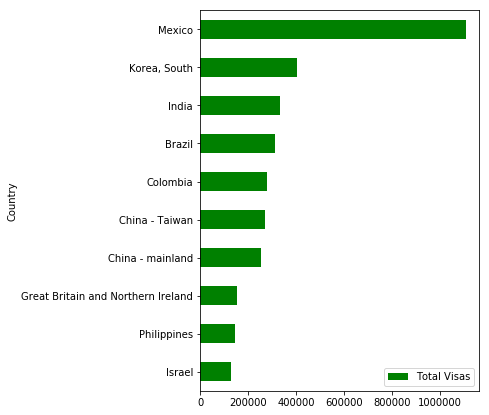

In [19]:
new2_df.sort_values(by= 'Total Visas').tail(10).plot(x='Country', y='Total Visas', kind='barh', figsize=(5, 7), color='green')


## Clean up that graph!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add commas for the number axis

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
```

In [20]:
import matplotlib.ticker as ticker

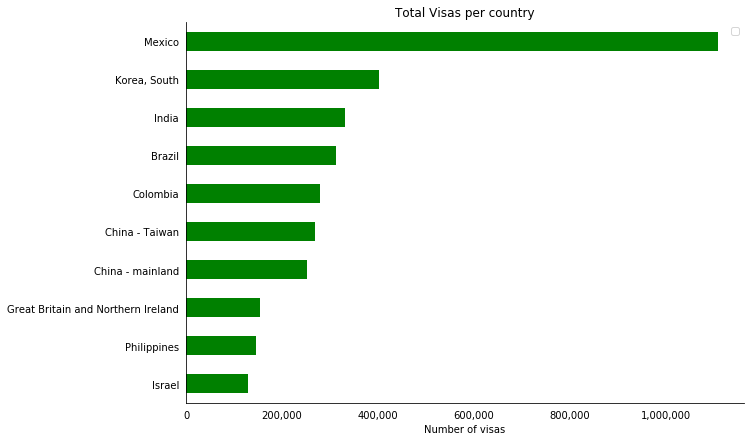

In [21]:
ax = new2_df.sort_values(by= 'Total Visas').tail(10).plot(x='Country', y='Total Visas', kind='barh', figsize=(10, 7), color='green')
ax.set_title("Total Visas per country")
ax.set_xlabel("Number of visas")
ax.set_ylabel('')
ax.legend('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

## Create a bar graph of the total number of F-1 visas from each continent

And make it look nice!

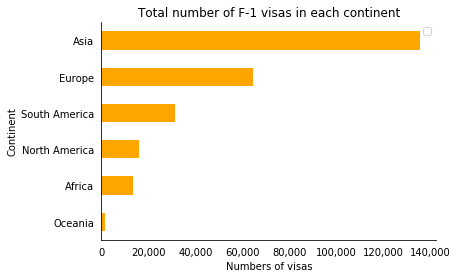

In [52]:
ax= new2_df[new2_df.continent != 'Unknown'].groupby('continent')['F-1'].sum().sort_values(ascending = True).plot(kind='barh', color ="orange")
ax.set_title("Total number of F-1 visas in each continent")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_ylabel('Continent')
ax.set_xlabel('Numbers of visas')
ax.legend('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Read in the data from 2000-2016

They should each be in a separate dataframe.

- Tip: Maybe I have quicker ways to do this?

In [23]:
sheetnames = [
    'FY97', 'FY98', 'FY99', 'FY00', 'FY01', 'FY02', 'FY03', 'FY04', 'FY05', 'FY06',
    'FY07', 'FY08', 'FY09', 'FY10', 'FY11', 'FY12', 'FY13', 'FY14', 'FY15', 'FY16'
]

In [24]:
list_of_shs = [pd.read_excel("FYs97-16_NIVDetailTable.xls", sheetname=sheet) for sheet in sheetnames]

# Clean them up, just like you did with the 1999 data

## STEP 1: For each of the dataframes, rename the "Fiscal Year XXXX" column as "Country"

- Tip: What does the code down below give you?

```python
df.columns.str.replace('Fiscal Year.*', 'Country')
```

- Tip: Is there another way to rename columns besides `.rename`?
- Tip: Use a for loop

In [25]:
%%time
for sheet in list_of_shs:
    sheet.columns =sheet.columns.str.replace('Fiscal Year.*', 'Country')


CPU times: user 9.57 ms, sys: 1.07 ms, total: 10.6 ms
Wall time: 14.8 ms


In [26]:
list_of_shs

[                                      Country      A-1      A-2     A-3  \
 0                                      Africa      NaN      NaN     NaN   
 1                                     Algeria     62.0     23.0     5.0   
 2                                      Angola     54.0    169.0     3.0   
 3                                       Benin     10.0     43.0     4.0   
 4                                    Botswana     10.0     79.0     1.0   
 5                                Burkina Faso     19.0      7.0     1.0   
 6                                     Burundi      5.0      2.0     0.0   
 7                                    Cameroon     44.0     52.0    11.0   
 8                                  Cape Verde      3.0     23.0     2.0   
 9                    Central African Republic      7.0      5.0     0.0   
 10                                       Chad     24.0     53.0     0.0   
 11                                    Comoros      0.0      4.0     0.0   
 12   Congo,

## STEP 2: Add the 'Continent' Column and get rid of the bad rows

The code below will drop any column where 'Country' has 'Totals for' in it. The trick we used above won't work because we're in a list.

```python
df.drop(df.index[df['Country'].str.contains("Totals for", na=False)])
```

In [27]:
for sheet in list_of_shs:
    sheet.loc[sheet['A-1'].isnull(), 'continent'] =  sheet['Country']
    sheet['continent'].fillna(method='ffill', inplace = True)
    sheet.dropna(subset=['Grand Total'], inplace= True)
    sheet = sheet.drop(sheet.index[sheet['Country'].str.contains("Totals for", na=False)])


In [28]:
list_of_shs[1]

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,continent
1,Algeria,48.0,46.0,0.0,1893.0,468.0,3264.0,10.0,0.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6469.0,128.0,6597.0,Africa
2,Angola,39.0,52.0,1.0,17.0,1395.0,302.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2222.0,0.0,2222.0,Africa
3,Benin,17.0,39.0,1.0,58.0,568.0,102.0,1.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1097.0,3.0,1100.0,Africa
4,Botswana,22.0,85.0,0.0,1.0,425.0,84.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1238.0,0.0,1238.0,Africa
5,Burkina Faso,42.0,31.0,3.0,52.0,739.0,218.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1378.0,1.0,1379.0,Africa
6,Burundi,11.0,36.0,0.0,13.0,122.0,44.0,4.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396.0,35.0,431.0,Africa
7,Cameroon,32.0,85.0,6.0,276.0,1315.0,809.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3300.0,3.0,3303.0,Africa
8,Cape Verde,12.0,26.0,1.0,5.0,2096.0,573.0,4.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2885.0,0.0,2885.0,Africa
9,Central African Republic,9.0,6.0,0.0,12.0,53.0,38.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,208.0,2.0,210.0,Africa
10,Chad,34.0,55.0,1.0,16.0,134.0,264.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,715.0,1.0,716.0,Africa


## STEP 3: Add the year to each dataframe

We can't combine them yet because you need to be able to separate them. Use the code below to get close.

```python
for sheet_df, fiscal_year in zip(sheets, sheetnames):
    sheet_df['year'] = fiscal_year
```

In [29]:
for sheet_df, fiscal_year in zip(list_of_shs, sheetnames):
    sheet_df['year'] = fiscal_year

In [30]:
list_of_shs[1].head()

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,continent,year
1,Algeria,48.0,46.0,0.0,1893.0,468.0,3264.0,10.0,0.0,69.0,...,0.0,0.0,0.0,0.0,0.0,6469.0,128.0,6597.0,Africa,FY98
2,Angola,39.0,52.0,1.0,17.0,1395.0,302.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,2222.0,0.0,2222.0,Africa,FY98
3,Benin,17.0,39.0,1.0,58.0,568.0,102.0,1.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,1097.0,3.0,1100.0,Africa,FY98
4,Botswana,22.0,85.0,0.0,1.0,425.0,84.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1238.0,0.0,1238.0,Africa,FY98
5,Burkina Faso,42.0,31.0,3.0,52.0,739.0,218.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,1378.0,1.0,1379.0,Africa,FY98


# Combining the dataframes into one big dataframe

Combine them, confirming the result has 4464 rows and 96 columns

- Tip: don't use .merge!

In [43]:
combined_df = pd.concat(list_of_shs, ignore_index=True)
pd.set_option("display.max_columns", 100)
combined_df

,A-1,A-2,A-3,B-1,"B-1,2","B-1,2/BCC","B-1,2/BCV",B-2,BCC,C-1,C-1/D,C-2,C-3,CW-1,CW-2,Country,D,D-CREW,E-1,E-2,E-2C,E-3,E-3D,E-3R,F-1,F-2,F-3,G-1,G-2,G-3,G-4,G-5,Grand Total,H-1A,H-1B,H-1B1,H-1C,H-2A,H-2B,H-2R,H-3,H-4,I,J-1,J-2,K-1,K-2,K-3,K-4,L-1,L-2,M-1,M-2,M-3,N-8,N-9,NATO-1,NATO-2,NATO-3,NATO-4,NATO-5,NATO-6,NATO-7,O-1,O-2,O-3,P-1,P-2,P-3,P-4,Q-1,Q-2,Q-3,R-1,R-2,S-5,S-6,S-7,T-1,T-2,T-3,T-4,T-5,T-6,TD,TN,Total Visas,U-1,U-2,U-3,U-4,U-5,V-1,V-2,V-3,continent,year
0,62.0,23.0,5.0,1661.0,507.0,0.0,0.0,3430.0,492.0,57.0,8.0,0.0,0.0,NaN,NaN,Algeria,12.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,114.0,6.0,0.0,39.0,54.0,0.0,126.0,2.0,6878.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,4.0,32.0,8.0,84.0,24.0,14.0,0.0,0.0,0.0,9.0,29.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,0.0,6386.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,FY97
1,54.0,169.0,3.0,10.0,1421.0,1.0,0.0,271.0,4.0,10.0,12.0,0.0,19.0,NaN,NaN,Angola,14.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,222.0,17.0,0.0,41.0,57.0,1.0,19.0,0.0,2401.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,4.0,1.0,0.0,0.0,0.0,8.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2397.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,FY97
2,10.0,43.0,4.0,104.0,375.0,0.0,0.0,249.0,10.0,37.0,1.0,0.0,2.0,NaN,NaN,Benin,29.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,45.0,2.0,0.0,23.0,37.0,0.0,42.0,14.0,1115.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,59.0,3.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1105.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,FY97
3,10.0,79.0,1.0,2.0,366.0,0.0,0.0,54.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN,Botswana,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,193.0,11.0,0.0,9.0,28.0,0.0,4.0,1.0,850.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,73.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,850.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,FY97
4,19.0,7.0,1.0,12.0,487.0,1.0,0.0,309.0,4.0,24.0,0.0,0.0,9.0,NaN,NaN,Burkina Faso,62.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,40.0,3.0,0.0,7.0,92.0,0.0,60.0,2.0,1196.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1192.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,FY97
5,5.0,2.0,0.0,57.0,97.0,3.0,0.0,60.0,74.0,49.0,0.0,0.0,0.0,NaN,NaN,Burundi,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,34.0,2.0,0.0,19.0,4.0,17.0,27.0,1.0,461.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,387.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,FY97
6,44.0,52.0,11.0,242.0,768.0,0.0,0.0,1128.0,10.0,53.0,0.0,0.0,1.0,NaN,NaN,Cameroon,3.0,0.0,1.0,2.0,NaN,0.0,0.0,0.0,202.0,5.0,0.0,28.0,130.0,0.0,105.0,5.0,2970.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,75.0,12.0,11.0,1.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,17.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2960.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,FY97
7,3.0,23.0,2.0,17.0,3273.0,0.0,0.0,763.0,1.0,16.0,54.0,0.0,1.0,NaN,NaN,Cape Verde,5.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,21.0,0.0,0.0,9.0,14.0,0.0,6.0,3.0,4262.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,8.0,0.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4261.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,FY97
8,7.0,5.0,0.0,7.0,69.0,0.0,0.0,33.0,2.0,5.0,0.0,0.0,1.0,NaN,NaN,Central African Republic,23.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,3.0,0.0,6.0,10.0,0.0,15.0,1.0,210.

## A little cleaning

Replace FY97 with 1997, FY98 with 1998, FY99 with 1999, FY00 with 2000, etc.

- Tip: You could do this in a fancy way using extract or loops or who knows what but honestly .replace might be fastest!

In [46]:
combined_df['year'] = combined_df['year'].str.replace("FY9","199")
combined_df['year'] = combined_df['year'].str.replace("FY0", "200")
combined_df['year'] = combined_df['year'].str.replace("FY1", "200")


In [47]:
combined_df

,A-1,A-2,A-3,B-1,"B-1,2","B-1,2/BCC","B-1,2/BCV",B-2,BCC,C-1,C-1/D,C-2,C-3,CW-1,CW-2,Country,D,D-CREW,E-1,E-2,E-2C,E-3,E-3D,E-3R,F-1,F-2,F-3,G-1,G-2,G-3,G-4,G-5,Grand Total,H-1A,H-1B,H-1B1,H-1C,H-2A,H-2B,H-2R,H-3,H-4,I,J-1,J-2,K-1,K-2,K-3,K-4,L-1,L-2,M-1,M-2,M-3,N-8,N-9,NATO-1,NATO-2,NATO-3,NATO-4,NATO-5,NATO-6,NATO-7,O-1,O-2,O-3,P-1,P-2,P-3,P-4,Q-1,Q-2,Q-3,R-1,R-2,S-5,S-6,S-7,T-1,T-2,T-3,T-4,T-5,T-6,TD,TN,Total Visas,U-1,U-2,U-3,U-4,U-5,V-1,V-2,V-3,continent,year
0,62.0,23.0,5.0,1661.0,507.0,0.0,0.0,3430.0,492.0,57.0,8.0,0.0,0.0,NaN,NaN,Algeria,12.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,114.0,6.0,0.0,39.0,54.0,0.0,126.0,2.0,6878.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,4.0,32.0,8.0,84.0,24.0,14.0,0.0,0.0,0.0,9.0,29.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,0.0,6386.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,1997
1,54.0,169.0,3.0,10.0,1421.0,1.0,0.0,271.0,4.0,10.0,12.0,0.0,19.0,NaN,NaN,Angola,14.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,222.0,17.0,0.0,41.0,57.0,1.0,19.0,0.0,2401.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,4.0,1.0,0.0,0.0,0.0,8.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2397.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,1997
2,10.0,43.0,4.0,104.0,375.0,0.0,0.0,249.0,10.0,37.0,1.0,0.0,2.0,NaN,NaN,Benin,29.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,45.0,2.0,0.0,23.0,37.0,0.0,42.0,14.0,1115.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,59.0,3.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1105.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,1997
3,10.0,79.0,1.0,2.0,366.0,0.0,0.0,54.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN,Botswana,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,193.0,11.0,0.0,9.0,28.0,0.0,4.0,1.0,850.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,73.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,850.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,1997
4,19.0,7.0,1.0,12.0,487.0,1.0,0.0,309.0,4.0,24.0,0.0,0.0,9.0,NaN,NaN,Burkina Faso,62.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,40.0,3.0,0.0,7.0,92.0,0.0,60.0,2.0,1196.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1192.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,1997
5,5.0,2.0,0.0,57.0,97.0,3.0,0.0,60.0,74.0,49.0,0.0,0.0,0.0,NaN,NaN,Burundi,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,34.0,2.0,0.0,19.0,4.0,17.0,27.0,1.0,461.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,387.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,1997
6,44.0,52.0,11.0,242.0,768.0,0.0,0.0,1128.0,10.0,53.0,0.0,0.0,1.0,NaN,NaN,Cameroon,3.0,0.0,1.0,2.0,NaN,0.0,0.0,0.0,202.0,5.0,0.0,28.0,130.0,0.0,105.0,5.0,2970.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,75.0,12.0,11.0,1.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,17.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2960.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,1997
7,3.0,23.0,2.0,17.0,3273.0,0.0,0.0,763.0,1.0,16.0,54.0,0.0,1.0,NaN,NaN,Cape Verde,5.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,21.0,0.0,0.0,9.0,14.0,0.0,6.0,3.0,4262.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,8.0,0.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4261.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,Africa,1997
8,7.0,5.0,0.0,7.0,69.0,0.0,0.0,33.0,2.0,5.0,0.0,0.0,1.0,NaN,NaN,Central African Republic,23.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,3.0,0.0,6.0,10.0,0.0,15.0,1.0,210.

# A little graphing

## Graph the number of visas granted to Colombia over time

Make it look nice!

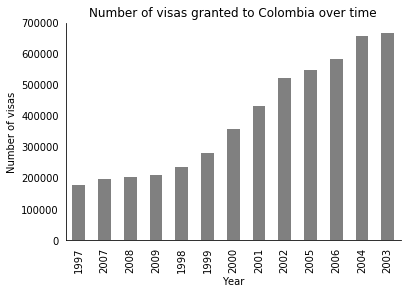

In [53]:
ax = combined_df[combined_df.Country == 'Colombia'].groupby('year')['Total Visas'].sum().sort_values(ascending=True).plot(kind='bar', color='grey')
ax.set_title("Number of visas granted to Colombia over time")
ax.set_ylabel('Number of visas')
ax.set_xlabel('Year')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

## How about Iraq?

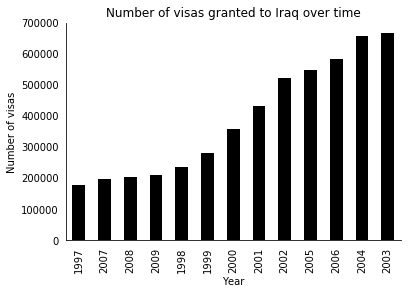

In [54]:
ax = combined_df[combined_df.Country == 'Colombia'].groupby('year')['Total Visas'].sum().sort_values(ascending=True).plot(kind='bar', color='black')
ax.set_title("Number of visas granted to Iraq over time")
ax.set_ylabel('Number of visas')
ax.set_xlabel('Year')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

## Mexico?

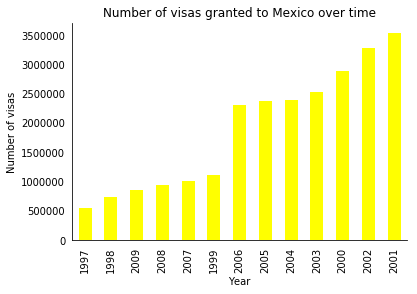

In [55]:
ax = combined_df[combined_df.Country == 'Mexico'].groupby('year')['Total Visas'].sum().sort_values(ascending=True).plot(kind='bar', color='yellow')
ax.set_title("Number of visas granted to Mexico over time")
ax.set_ylabel('Number of visas')
ax.set_xlabel('Year')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')